<a href="https://colab.research.google.com/github/KevinCY-Kim/Deeplearning/blob/main/%ED%9A%8C%EA%B7%80(Regression)_%EC%99%80_%EB%B6%84%EB%A5%98(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#회귀(Regression) 와 분류(Classification)
   선형회귀(Linear Regression) vs 로지스틱 회귀(Logistic Regression)
   1. 통계에서 선형회귀와 로지스틱 회귀

1) 선형 회귀 (Linear Regression)

* 정의: 연속형 종속변수(숫자형 Y)를 독립변수 X로 예측하는 모형
* 수식:

→ 연속형 수치

* 장점: 단순, 해석 용이 (계수 해석 가능)
* 단점: 이상치에 민감, 종속변수가 범주형일 경우 부적절

  “연속형 데이터 예측 = 선형 회귀”

2) 로지스틱 회귀 (Logistic Regression)

* 정의: 종속변수가 이산형(이진/범주형)일 때 확률 예측
* 수식:


* 출력값: 0~1 사이 확률 → 임계값(보통 0.5) 기준 분류
* 장점:
    * 분류 문제에서 사용됨
    * 해석력(계수=로그 odds ratio) 높음
    * 계산 효율적
* 단점:
    * 선형 경계만 모델링 가능 (비선형은 한계)
    * 고차원/복잡 데이터에는 성능 제한

   “종속변수가 범주형일 때 = 로지스틱 회귀”

3) 소프트맥스 회귀 (Softmax Regression, 다항 로지스틱 회귀)

* 정의: 로지스틱 회귀를 다중 클래스(3개 이상)로 확장
* 수식:


* 출력값: 각 클래스별 확률 (합=1)
* 장점:
    * 다중 범주 분류에 적합 (예: 0,1,2 클래스)
    * 확률값 제공 → 해석 쉬움
* 단점:
    * 클래스 불균형 시 예측 성능 저하
    * 계산량 증가 (K클래스마다 확률 계산)

   “다중 범주 분류 → Softmax 회귀(다항 로지스틱 회귀)”


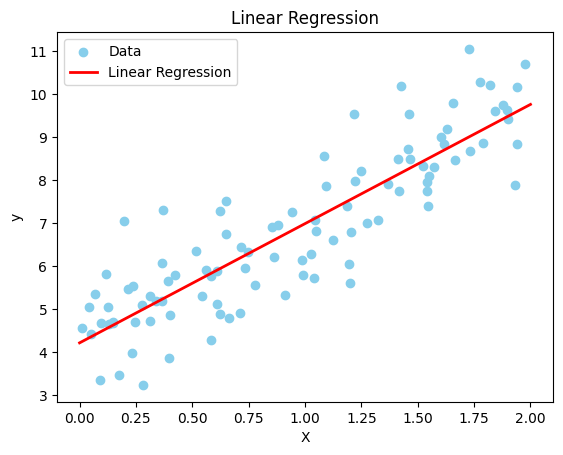

In [1]:
# 선형회귀 (Linear Regression)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터 생성
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# 모델 훈련
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# 예측
X_new = np.linspace(0, 2, 100).reshape(100, 1)
y_pred = lin_reg.predict(X_new)

# 시각화
plt.scatter(X, y, color="skyblue", label="Data")
plt.plot(X_new, y_pred, color="red", linewidth=2, label="Linear Regression")
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


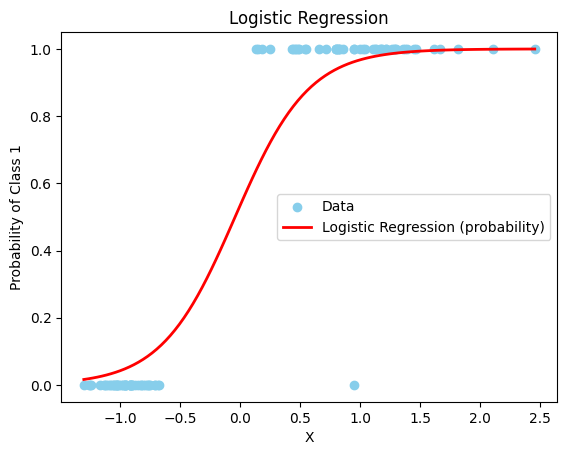

In [2]:
# 로지스틱 회귀 (Logistic Regression)
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# 데이터 생성 (이진 분류용)
X, y = make_classification(n_samples=100, n_features=1,
                           n_informative=1, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# 모델 훈련
log_reg = LogisticRegression()
log_reg.fit(X, y)

# 예측 확률
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_new)[:, 1]

# 시각화
plt.scatter(X, y, color="skyblue", label="Data")
plt.plot(X_new, y_prob, color="red", linewidth=2, label="Logistic Regression (probability)")
plt.title("Logistic Regression")
plt.xlabel("X")
plt.ylabel("Probability of Class 1")
plt.legend()
plt.show()


선형회귀 → 직선으로 예측

로지스틱 회귀 → S자 곡선(Sigmoid)로 확률을 모델링

2. 머신러닝과 딥러닝에서 선형회귀와 로지스틱 회귀

1) 선형 회귀 (Linear Regression in DL)

* 딥러닝 적용:
    * 신경망 마지막 층의 활성화 함수를 사용하지 않고(Linear) 그대로 출력
    * 예: 주택 가격 예측, 체온 예측 (연속값 예측)
* 손실 함수: MSE(Mean Squared Error), MAE
* 장점: 간단, 수치 예측에 적합
* 단점: 복잡한 패턴 표현력은 신경망의 깊이에 의존

2) 로지스틱 회귀 (Logistic Regression in DL)

* 딥러닝 적용:
    * 마지막 층에 시그모이드(Sigmoid) 활성화 함수 사용
    * 출력값: 0~1 사이 확률
    * 예: 암 여부 판별(암/정상), 스팸메일(스팸/정상)
* 손실 함수: Binary Cross-Entropy
* 장점: 확률 기반 해석 가능, 이진 분류 표준
* 단점: 선형 결정경계 한계 → CNN, RNN 등과 결합해 보완

3) 소프트맥스 회귀 (Softmax Regression in DL)

* 딥러닝 적용:
    * 마지막 층에 Softmax 활성화 함수 적용
    * 출력값: 각 클래스별 확률 (합=1)
    * 예: 이미지 분류 (고양이/개/말), 감정 분류(긍정/부정/중립)
* 손실 함수: Categorical Cross-Entropy
* 장점: 다중 클래스 분류 가능, 확률적 해석 쉬움
* 단점: 클래스 불균형에 취약, 계산량 많음

✅ 요약

* 연속형 예측 = Linear + MSE

* 이진 분류 = Sigmoid + Binary Cross-Entropy
* 다중 분류 = Softmax + Categorical Cross-Entropy

3. ReLU (Rectified Linear Unit)

1) 정의

* ReLU는 은닉층(hidden layer) 에서 가장 널리 쓰이는 활성화 함수(activation function)
* 수식: f(x) = \max(0, x)
* 입력이 0보다 크면 그대로 출력, 0 이하이면 0 출력


2) 특징

* 장점
    * 계산 간단 (0 또는 그대로)
    * 비선형성 제공 → 신경망이 복잡한 패턴 학습 가능
    * 시그모이드/탄핵(tanh) 대비 기울기 소실(Vanishing Gradient) 문제 완화
* 단점
    * 음수 입력 구간에서 항상 0 → 죽은 뉴런(Dead Neuron) 문제
    * 이를 개선한 변형: Leaky ReLU, ELU, GELU 등

3) 활용 위치

* 은닉층(Hidden Layer): ReLU 또는 변형 함수 (Leaky ReLU 등)
* 출력층(Output Layer): 문제 유형에 따라 Linear / Sigmoid / Softmax 선택
    * 회귀 → Linear
    * 이진 분류 → Sigmoid
    * 다중 분류 → Softmax

  👉 ReLU는 “중간 계산” 담당,   Sigmoid/Softmax는 “최종 결과 해석” 담당

4. 은닉층(Hidden Layer)에 ReLU를 쓴다는 의미

1) 신경망 구조 복습

* 입력층(Input Layer): 데이터 X가 들어오는 곳
* 은닉층(Hidden Layers): 입력을 여러 번 변환·조합해서 특징을 추출하는 중간 층
* 출력층(Output Layer): 최종 결과 (예측값, 확률, 클래스 등)
    👉 은닉층은 말 그대로 ‘중간 계산 과정’

2) 활성화 함수의 역할

* 단순 선형(Linear) 계산만 반복하면 → 아무리 층을 쌓아도 전체는 하나의 선형식으로 단순화됨
* 따라서 **비선형성(non-linearity)**을 주어야 복잡한 패턴 학습 가능
* ReLU는 그 비선형성을 간단하고 효과적으로 제공하는 함수

3) 은닉층에서 ReLU 쓰는 이유

* 장점

    1. 계산 간단 (max(0,x)) → 빠름
    2. 기울기 소실(Vanishing Gradient) 문제 완화 (Sigmoid보다 안정적)
    3. 딥러닝에서 깊은 층을 학습할 때 거의 표준처럼 사용

* 사용 시점

    1. CNN 합성곱 계층 뒤 (Conv → ReLU → Pooling)
    2. MLP(다층 퍼셉트론) 은닉층
    3. RNN 계열에도 변형 ReLU(Leaky ReLU, GELU 등) 사용

4) 은닉층 vs 출력층 활성화 함수 구분

* 은닉층 → 특징을 학습하는 단계 → ReLU(혹은 변형)
* 출력층 → 문제의 성격에 맞춰 선택
    * 회귀 → Linear
    * 이진 분류 → Sigmoid
    * 다중 분류 → Softmax

✅ 정리

* 은닉층 = 특징 추출 (ReLU로 비선형성 부여)
* 출력층 = 문제 목적에 맞는 해석 (Linear / Sigmoid / Softmax)


“은닉층에 ReLU 쓴다”는 말은 → “중간 계산 단계에서 데이터를 잘 변환할 수 있도록 ReLU를 활성화 함수로 쓴다”는 뜻


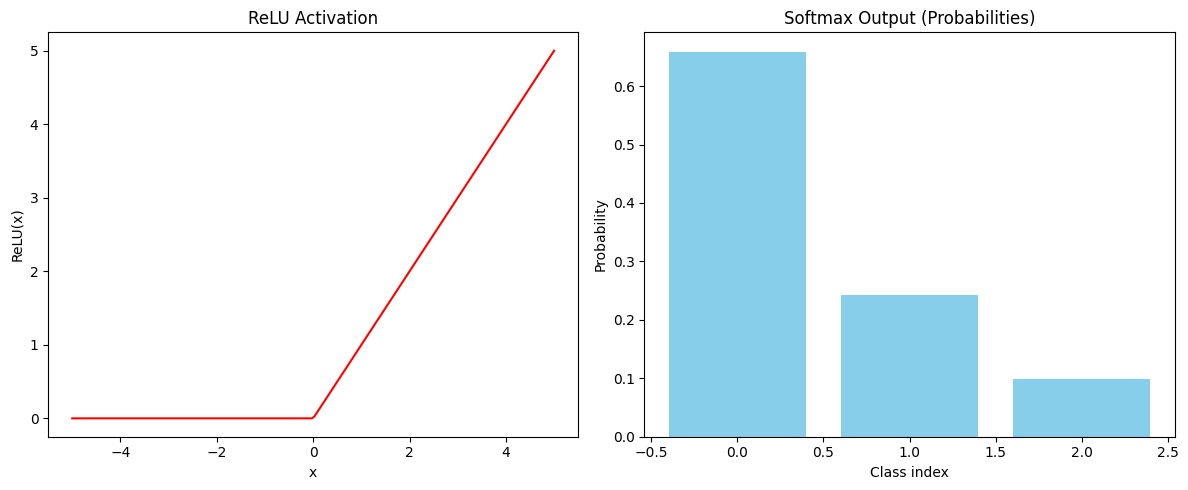

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. ReLU 함수
def relu(x):
    return np.maximum(0, x)

# 2. Softmax 함수
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # 안정적 계산
    return exp_z / exp_z.sum(axis=0, keepdims=True)

# 입력 데이터
x = np.linspace(-5, 5, 200)
z = np.array([2.0, 1.0, 0.1])  # Softmax 예시 벡터

# ReLU 결과
y_relu = relu(x)

# Softmax 결과
y_softmax = softmax(z)

# 시각화
plt.figure(figsize=(12, 5))

# 1️⃣ ReLU Plot
plt.subplot(1, 2, 1)
plt.plot(x, y_relu, color="red")
plt.title("ReLU Activation")
plt.xlabel("x")
plt.ylabel("ReLU(x)")

# 2️⃣ Softmax Plot
plt.subplot(1, 2, 2)
plt.bar(range(len(z)), y_softmax, color="skyblue")
plt.title("Softmax Output (Probabilities)")
plt.xlabel("Class index")
plt.ylabel("Probability")

plt.tight_layout()
plt.show()


왼쪽 그래프 → ReLU 함수 (음수는 0, 양수는 그대로)

오른쪽 막대 그래프 → Softmax가 입력 [2, 1, 0.1] 을 확률(합=1) 로 변환한 결과